# 음성 합성(Speech Synthesis)

* https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/SpeechSynthesis/Tacotron2

## Tacotron 2

* 텍스트에서 멜 스펙트로그램 생성

* https://pytorch.org/hub/nvidia_deeplearningexamples_tacotron2/

<img src="https://pytorch.org/assets/images/tacotron2_diagram.png" alt="alt" width="50%"/>

* Pre-net과 Post-net으로 구분해서 Pre-net에 오면 다시 2 LSTM Layer를 거쳐서 반복 순회 과정을 거침
* Post-net에 도달하면 Mel Spectrogram 생성
* Mel Spectrogram이 생성되면 Wavenet model이 아닌 Waveglow model에 input 되어 최종 출력은 Voice가 됨.


* Pretrained model을 사용
* Made By NVIDIA

## WaveGlow

* 멜 스펙트로그램에서 음성 생성

* https://pytorch.org/hub/nvidia_deeplearningexamples_waveglow/

<img src="https://pytorch.org/assets/images/waveglow_diagram.png" alt="alt" width="50%"/>

* 더 좋은 성능을 위해 wavenet이 아닌 wavrglow를 사용.
* Glow + WaveNet = WaveNet(Vocoder)
* Auto Regression 형태의 아키텍쳐를 사용하지 않아서 WaveNet 보다 빠른 속도로 고품질 음성을 합성 할 수 있음.
* WaveNet보다 약간 품질이 저하될 수 있으나 거의 차이 없음.
* 8GB의 GPU memory 필요.
* output은 'Audio.wav'로 저장할 수 있으며 바로 재생가능.

* tacotron2 + Waveglow
 * text -> image -> voice(text to speech)

In [34]:
!pip install numpy scipy librosa unidecode inflect

* LJ Speech dataset에서 사전 학습된 Tacotron2와 WaveGlow 모델 로드

In [35]:
import torch

# 수정 후 model_matj='fp16' 추가
tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2', model_math='fp16')
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp16')

Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


In [36]:
# tacotron2의 구조 확인
tacotron2 = tacotron2.to('cuda') # GPU 연산을 수행할 수 있도록 사용.
tacotron2.eval()

Tacotron2(
  (embedding): Embedding(148, 512)
  (encoder): Encoder(
    (convolutions): ModuleList(
      (0): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (lstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (prenet): Prenet(
      (layers): ModuleList(
        (0): LinearNorm(
          (lin

In [37]:
# waveglow = waveglow.remove_weightnorm(waveglow) # 영상에서 error 생겼던 코드
waveglow = waveglow.to('cuda')
waveglow.eval()

WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0): WN(
      (in_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
        (1): Conv1d(51

## Text To Speech(TTS)
* 2021.03 merge 과정에서 문제가 발생하여 이 코드는 사용할 수 없게 되었음. 사용하기 위해서 권장사양을 변경해야 함.

In [38]:
!nvidia-smi

Thu Sep 16 12:56:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   8323MiB / 11441MiB |     55%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

재현하려면 Google colab 또는 내 로컬 컴퓨터에서 튜토리얼을 실행하더라도 상관없이 발생합니다.

텍스트를 입력하여 tacotron2 모델에서 예상되는 동작 시퀀스를 생성해야 합니다.

환경 최소한 다음을 제공하십시오.

컨테이너 버전(예: pytorch:19.05-py3): pytorch 1.8.1+cu102
시스템의 GPU: (예: Tesla V100-SXM2-16GB 8개): GTX1080
CUDA 드라이버 버전(예: 418.67): 11.2

## 수정 된 TTS

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import librosa.display
from IPython.display import Audio

In [40]:
# 시각화 
def plot_data(data, figsize=(16,4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom',
                       interpolation='none', cmap='viridis')

def TTS(text):

    sampling_rate = 22050
    
    # 수정 전
    # sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None,:]
    # sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
     
    # 수정 후
    utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')
    sequences, lengths = utils.prepare_input_sequence([text])
    
    '''
    연결된 모델 실행
    '''
    with torch.no_grad():
        mel_outputs_postnet, mel_lengths, alignments = tacotron2.infer(sequences, lengths) 
        audio = waveglow.infer(mel_outputs_postnet)
    # 수정 후    
    audio_numpy = audio[0].data.cpu().numpy()   
    
    # 수정 전
    # mel_output = mel_outputs.data.cpu().numpy()[0]
    mel_outputs_postnet = mel_outputs_postnet.data.cpu().numpy()[0]
    alignments = alignments.data.cpu().numpy()[0].T

    return mel_outputs_postnet, alignments, audio_numpy, sampling_rate

* axes.imshow()
 * [imshow() 인자 설명 - matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)
* audio_numpy = audio[0].data.cpu().numpy()
 * GPU에 있는 것을 CPU로 바꾸고 numpy로 바꿔서 사용.
* tacotron2.infer():
 * 모델 추론
* with torch.no_grad():
 * gradient 연산 옵션을 사용하지 않을 때
 * 여기 내부에서 새로 생성된 텐서들은 requires_grad=False가 되어 메모리 사용량을 아낄 수 있다.


Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


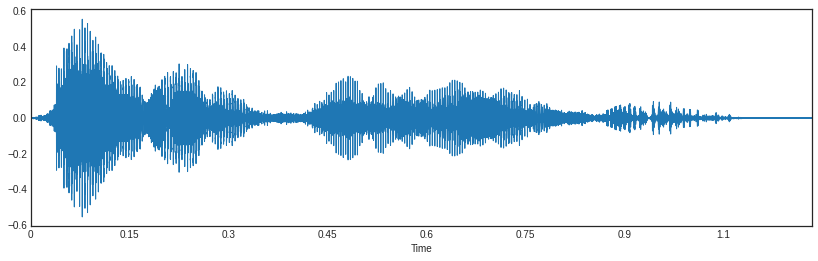

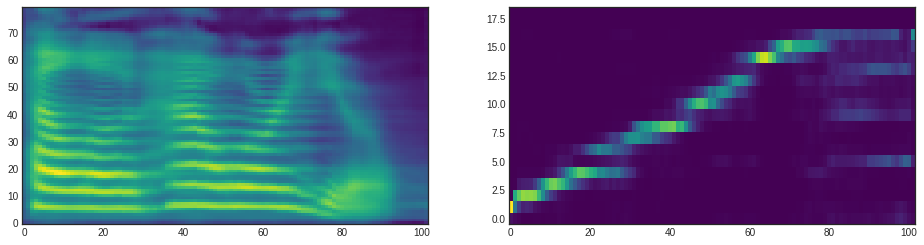

In [43]:
text = 'Hello, how are you?'
mel_outputs_postnet, alignments, audio_np, sampling_rate = TTS(text)

fig = plt.figure(figsize=(14, 4))
librosa.display.waveplot(audio_np, sr=sampling_rate)
plot_data((mel_outputs_postnet, alignments))
Audio(audio_np, rate=sampling_rate)

* mel_outputs_postnet, alignments, audio_np, sampling_rate = TTS(text)
 * text를 TTS 함수에 넣고 반환되는 결과를 그대로 넣는다.

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


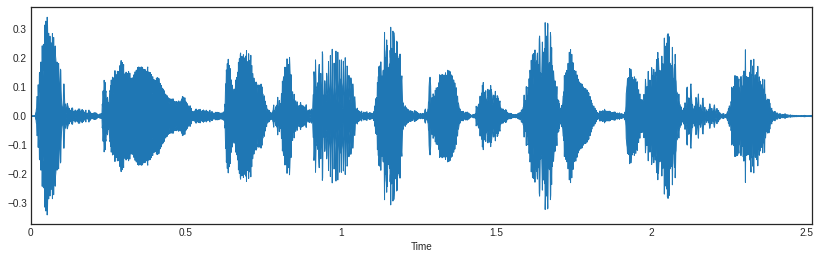

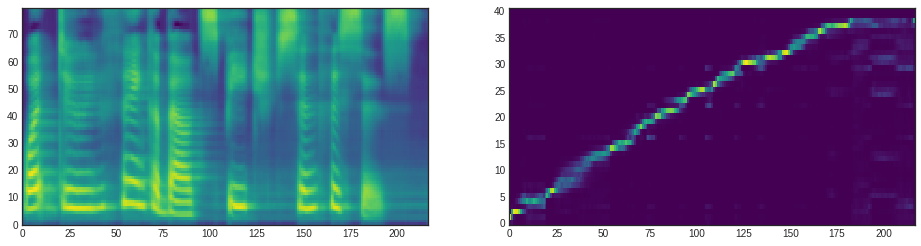

In [42]:
text = 'What do you think about speech synthesis?'
mel_outputs_postnet, alignments, audio_np, sampling_rate = TTS(text)

fig = plt.figure(figsize=(14, 4))
librosa.display.waveplot(audio_np, sr=sampling_rate)
plot_data((mel_outputs_postnet, alignments))
Audio(audio_np, rate=sampling_rate)

* mel_output, mel_output_postnet : tacotron2의 output인 mel_spectrogram
* alignment : x축은 Decoder timesteps, y는 Encoder states

# 음성 합성 참고
* [타코트론2 TTS 시스템 1/2 - Code Journey](https://joungheekim.github.io/2021/04/01/code-review/)
* [타코트론2 TTS 시스템 2/2 - Code Journey](https://joungheekim.github.io/2021/04/02/code-review/)
* [타코트론2 논문 리뷰 - Code Journey ](https://joungheekim.github.io/2020/10/08/paper-review/)


* [타코트론 논문 - Hyungcheol Noh's Blog](https://hcnoh.github.io/2018-12-11-tacotron)